<a href="https://colab.research.google.com/github/MuhammadHassan667410/160-Days-of-learning-complete-AI/blob/main/Phase%202%20%3A%20Machine%20Learning%2C(Day%2020%20to%2050)/Time%20Series%20Forecasting(Day%2043%20-%2045)/TimeSeriesBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [3]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


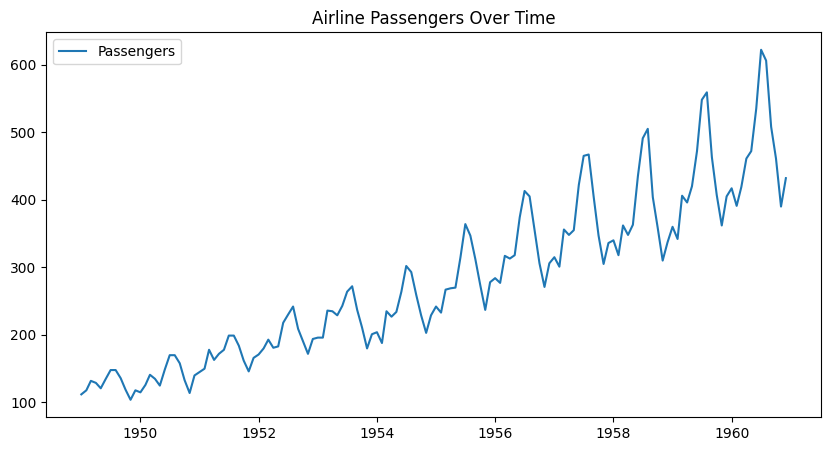

In [4]:
plt.figure(figsize=(10,5))
plt.plot(data, label='Passengers')
plt.title("Airline Passengers Over Time")
plt.legend()
plt.show()



In [15]:
results1 = adfuller(data.Passengers)
print("ADF Statistic:", results1[0])
print("p-value:", results1[1])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [16]:

if results1[1] > 0.05:
    print("Series is NOT stationary")
else:
    print("Series is stationary")

Series is NOT stationary


In [7]:
data['Lag1'] = data.Passengers.shift(1)
data.head()

,Passengers,Lag1
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    int64  
 1   Lag1        143 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [9]:
data['diff'] = data['Passengers'].diff()

In [10]:
data

,Passengers,Lag1,diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
...,...,...,...
1960-08-01,606,622.0,-16.0
1960-09-01,508,606.0,-98.0
1960-10-01,461,508.0,-47.0


In [24]:
results2 = adfuller(data['diff'].dropna())
print("ADF Statistic:", results2[0])
print("p-value:", results2[1])

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [25]:
if results2[1] > 0.05:
    print("Series is NOT stationary")
else:
    print("Series is stationary")

Series is NOT stationary


In [27]:
data['diff2'] = data['diff'].diff()
results3 = adfuller(data['diff2'].dropna())
print("ADF Statistic:", results3[0])
print("p-value:", results3[1])

ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29


In [28]:
if results3[1] > 0.05:
    print("Series is NOT stationary")
else:
    print("Series is stationary")

Series is stationary


In [30]:
data['SeasonalDiff'] = data['Passengers'].diff(12)
results4 = adfuller(data['SeasonalDiff'].dropna())
print("ADF Statistic:", results4[0])
print("p-value:", results4[1])

ADF Statistic: -3.383020726492481
p-value: 0.011551493085514952


In [31]:
if results3[1] > 0.05:
    print("Series is NOT stationary")
else:
    print("Series is stationary")

Series is stationary


In [32]:
data

,Passengers,Lag1,diff,diff2,SeasonalDiff
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,6.0,NaN,NaN
1949-03-01,132,118.0,14.0,8.0,NaN
1949-04-01,129,132.0,-3.0,-17.0,NaN
1949-05-01,121,129.0,-8.0,-5.0,NaN
...,...,...,...,...,...
1960-08-01,606,622.0,-16.0,-103.0,47.0
1960-09-01,508,606.0,-98.0,-82.0,45.0
1960-10-01,461,508.0,-47.0,51.0,54.0


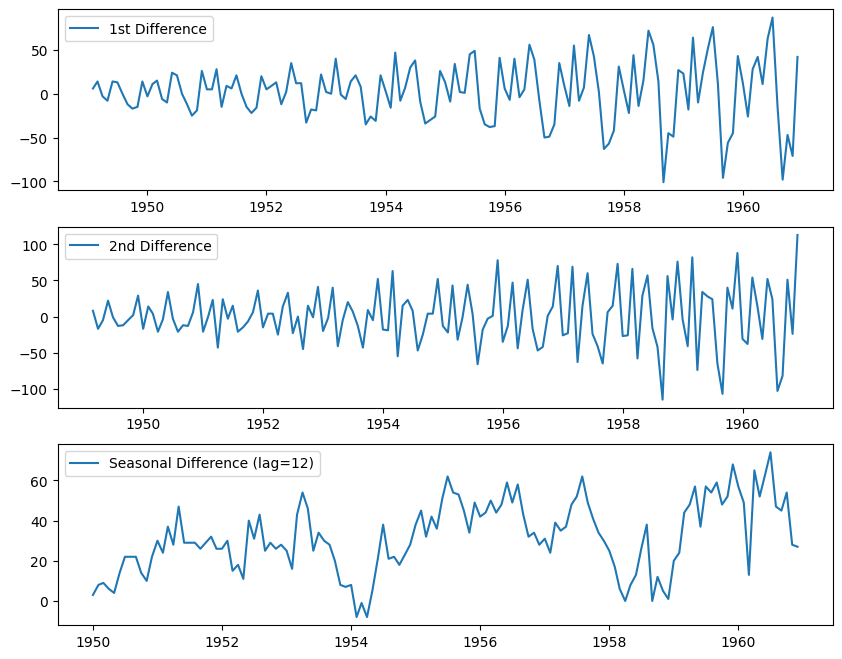

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(10,8))
axes[0].plot(data['diff'], label="1st Difference")
axes[1].plot(data['diff2'], label="2nd Difference")
axes[2].plot(data['SeasonalDiff'], label="Seasonal Difference (lag=12)")
for ax in axes:
    ax.legend()
plt.show()


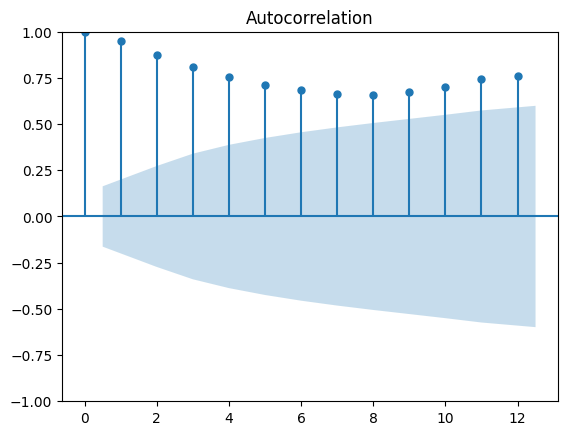

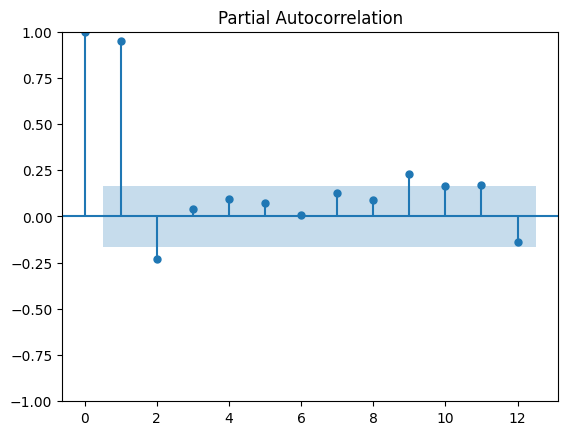

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Passengers'].dropna(), lags=12)
plot_pacf(data['Passengers'].dropna(), lags=12)
plt.show()
